# Regression and Classification Assignment

This notebook uses the data discussed in regression_and_classification notebook.   You may want to review that if you
have trouble with the assignment.

## 1. The data

First we do some imports and load the data from the `sklearn` module.

In [1]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score,precision_score, recall_score
from sklearn import linear_model
import numpy as np


data = load_iris()
features = data['data']
feature_names = data['feature_names']
target = data['target']

## 2.  The questions

**Q1**

Don't take my word for it that subsets of the 4 Iris features always produce a worse classifier.
Try it out.

Change the selector array in the next cell and execute the code
in the cell to try out your own favorite subsets
of features.  No subset of 2 or even 3 features performs as well as using all 4.

For example, using this selector
```
selector = np.array([True,True,False,True])
```

leaves out just  the third feature.  Here's your challenge: Find the best 2-feature
system (it performs almost as well as any 3-feature system), and the best
3-feature system.  Hint for the 2-feature problem, if you want to get there more
quickly.  Look at our plots of two-feature systems in the "Plotting 2D Projections of the data"
section of the regression_and_classification.ipynb notebook (Section 3).  Which one **looks**
like it gives the best separation?

In [2]:
#Use selected features
selector = np.array([True,True,False,False])
X = features[:,selector]
#X = features
Y = target
logreg = linear_model.LogisticRegression(C=1e5, solver='lbfgs',multi_class='auto')
logreg.fit(X, Y)

#Tesing on training set.  Not usually done.
predicted = logreg.predict(X)
accuracy_score(Y,predicted)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


0.8333333333333334

To give a clue as to how to code up a comparison of different classification
models,  consider the following code, which uses 4 variant models
and evaluates each model using the Accuracy metric.

The SVC classifier with the RBF kernel is the winner, but not
by much.

In [3]:
from sklearn import svm, datasets

#An SVM parameter, some others below.
C=1.0

# Cook up a tuple of models to test (These are the models from the last
# plot in the simple regression NB)

models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))

# train them Notice this is not a list comprehension but looks like one.
models = (clf.fit(X, Y) for clf in models)

#Testing on training set.  Not usually done.
predicted = [model.predict(X) for model in models]
accuracy = [accuracy_score(Y,prediction) for prediction in predicted]
accuracy

[0.82, 0.8, 0.8266666666666667, 0.8133333333333334]

One final point, this is balanced data, so it's not unreasonable to
use accuracy to compare the 6 models, as in the cell above,
but be sure to compare the accuracy over 10 different train/test splits as we did
in Section 6 of the regression_and_classification notebook.  That means each of the 6 classifiers you're testing will generate 10 accuracy scores.  In order to declare a final winner, you should
average the 10 accuracy scores.  The winner will be the classifier that achieves the highest average accuracy
over the 10 test runs.


**Q2**

In the regression_and_classification notebook,
we implemented a function called `is_red` that is supposed to distinguish
class 0 from classes 1 and 2.  Here is the definition and an example of using it
on a row of the Iris dataset.

In [4]:
def is_red (P):
    """
    P is a data point, all 4 attributes.

    Return True if P is in positive class.
    """
    return (P[2] - .9*P[0] + 2) < 0

P = features[-90]
print('P is red: {0}'.format(is_red(P)))

P is red: False


We call such a function a model (a model of `redness` in this case).

Consider a different model.  A model of non-redness. This model
has a different positive class (non red instead of red).  We illustrate by applying to our
model to example point P, which is not red:

In [5]:
def is_non_red (P):
    """
    P is a data point, all 4 attributes.

    Return True if P is in positive class.
    """
    return (P[2] - .9*P[0] + 2) > 0

P = features[-90]
print('P is non red: {0}'.format(is_non_red(P)))

P is non red: True


Write some code to evaluate this model's accuracy
in predicting non-redness.  Before calling the `accuracy_score` function,
you will have to compute `predicted` using `is_non_red` to give you an array of predictions


To create a prediction array using `is_non_red`, apply it to every row
of `features`:

```
np.apply_along_axis(is_non_red, axis=1, arr= features)
```

You will also have to evaluate accuracy against a different standard.
You can't evaluate against the class array `target` defined above
because that has three classes and `is_non_red` essentially works with two.
You have to start by creating a different
class array that only has two classes, matching the kind of results `is_non_red` produces.
The red class is 0, so you want `True` for every class 1 or 2 iris, and
`False` for every class 0 iris. For this, use a Boolean mask on `target`.

For this problem, you do not have to different train/test splits.

In [11]:
np.apply_along_axis(is_non_red, axis=1, arr= features)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

**Q3  Visualization**

Using the `rock vs. mines` data set loaded in the next cell, draw a scatterplot of the points like the ones we did in Section 2 and 3 of the regression_and_classification notebook (R&C NB) for the iris data.
You will find the code in Section 3 of the R&C NB will require the least modification.

This data set tries to distinguish two classes, rocks and mines, based on sonar readings.
As the loading code indicates, this data has 60 features, which is a lot, so you should
just pick one pair of features out and plot them.  Crucially,
you **don't** need to plot all pairs (there are 1770 pairs).

When modifying the code to draw the picture, bear in mind you really only need to
scatter the points.  You are not being asked to draw a separation line,
and you don't need to draw the point P being depicted in Sections 2 and 3,
because it doesn't appear in this data.

You should try to give the points belonging to the two classes different colors
and shapes, as was done in R&C NB.

In [12]:
import pandas as pd

target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/undocumented/connectionist-bench/sonar/sonar.all-data")

#read rocks mines data
mine_df = pd.read_csv(target_url, header=None), prefix="V")
#mine_df = pd.read_csv(target_url, header=None)
mine_features = mine_df.values
(samp_sz, num_feats) = mine_features.shape
print('{0} exemplars with {1} features'.format(samp_sz, num_feats))
# The last column contains the class data.  Separate it from the others.
target = mine_features[:, 60]
# Everything else is a feature
mine_features = mine_features[:, :60]
(samp_sz, num_feats) = mine_features.shape

# Find the two classes we're trying to separate.
feat_set = list(set(target))
print('{0} classes: {1}'.format(len(feat_set), feat_set))

SyntaxError: unmatched ')' (<ipython-input-12-d218aec561c2>, line 7)

In [9]:
markers,colors = 'ox','rg'
list(zip(range(3),markers,colors))

[(0, 'o', 'r'), (1, 'x', 'g')]

In [10]:
mine_features[target==0,0]

NameError: name 'mine_features' is not defined

In [13]:
list(range(3))

[0, 1, 2]

**Q4**

Combining variables: Cheap non-linearity

The [Heidelberg stat-center](http://www.statlab.uni-heidelberg.de/data/iris/) reports a very nice result obtained by combining
the 2 petal features and the  2 sepal features by multiplication.  We end up with 2 **area** features, and a system that's almost as good as a 4-feature linear system,
at the cost of a little non-linearity (the multiplication). Here's the computation,
and the picture, both of which are very simple.  

Notice what the picture is telling us:  Petal area alone
is enough to almost perfectly perform the discrimination.  And the insight can easily be made visual.

Text(0, 0.5, 'petal area')

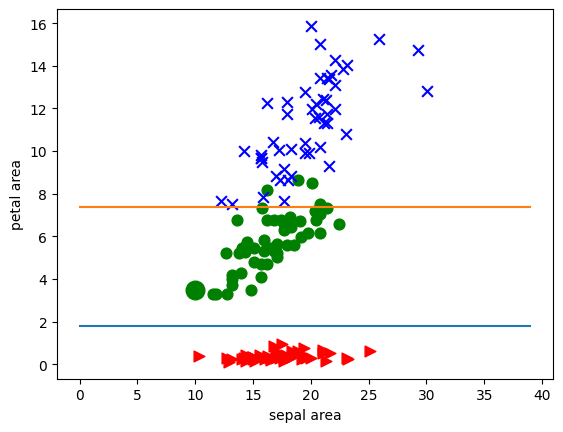

In [14]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score,precision_score,recall_score
import numpy as np
from matplotlib import pyplot as plt

data = load_iris()
features = data['data']
feature_names = data['feature_names']
target = data['target']
sepal_area = features[:,0] * features[:,1]
petal_area = features[:,2] * features[:,3]

for t,marker,c in zip(list(range(3)),">ox","rgb"):
    plt.scatter(sepal_area[target == t], petal_area[target == t], marker=marker, c=c,s=60)

# Let's draw our point P with extra special attention getting large SIZE.
p_sepal_area,p_petal_area,p_target  = sepal_area[-90],petal_area[-90],target[-90]
marker,clr = ">ox"[p_target], "rgb"[p_target]
plt.scatter(p_sepal_area,p_petal_area,marker=marker,c=clr,s=180)

# Let's draw some linear separators, horizontal lines in this case
plt.plot(np.arange(0.,40.),np.array([1.8]*40))
plt.plot(np.arange(0.,40.),np.array([7.4]*40))
plt.axis('tight')
plt.xlabel('sepal area')
plt.ylabel('petal area')

**Q4: Part A**

Validate what the picture is telling you by training and evaluating a `linear_model.LogisticRegression`
classifier that uses **only** the petal area feature (the main
dimension of separation in the picture).   Be sure to do a training/test split and
use 20% of the data for your test, as in

```python
from sklearn.model_selection import train_test_split

# Split the data into a training set and a test set (random_state=0 guarantees the same
# split on multiple runs)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=47)
```

For this problem, you do not have to do multiple train/test runs.

You can define values for `petal_area` feature by evaluating the cell above.  Your
answer can rely on that definition
and therefore should be only a few lines of code.  The last few lines should print out
precision, recall, and accuracy scores for your classifier.

For submitting your discussion question answers, you will want to
submit the few lines of code plus some evaluation results. For those,
consider the following points.

1.  When we defined precision and recall, we did so in a setting where there
    were only two classes.  For this problem there are three classes, which
    means you will need to choose between different interpretation of
    precision and recall.  Use `average=None`, as in

    ```python
    metrics.precision_score(actual,predicted,average=None)
    ```

    This means you will get three different precision scores,
    one for each species, instead of a single averaged score.

2. You may also find it interesting to try out the scikit learn confusion matrix:

   ```python
   from sklearn import metrics
   print(metrics.confusion_matrix(actual, predicted))
   ```

   For a slightly different display strategy, see the section entitled **An evaluation experiment** in the [Classification notebook.](https://colab.research.google.com/github/gawron/python-for-social-science/blob/master/text_classification/regression_and_classification.ipynb)
   You might also want to try the variant `multilabel_confusion_matrix` appropriate for multiclass problems,
   which returns a 3D matrix, one layer for each class, where each layer is a 2x2 (one vs all) confusion matrix
   for its class.

3.  Finally, for an informative (but not complete) report on your classifier, try

    ```python
    print(metrics.classification_report(actual, predicted, digits=3))
    ```

    which also gives support figures --- how many instances of each class were found in the data --- and F-score, a way of averaging the precision and recall scores.
    
    By default, `classification_report` returns a formatted string which can be printed
    as done here. With the optional argument `output_dict=True`, it returns a dictionary,
    which you can do more with, such as creating a pandas `DataFrame` using `pd.DataFrame.from_dict`.
    This gives you more control over what things are displayed and how.
    
    An alternative way of getting at the numbers you want is
    
    ```python
    (p,r,f,s) = metrics.precision_recall_fscore_support(Y,predicted,average=None)
    ```
    
    Again, it would make sense to store these numbers in a DataFrame.  
    
Motivational note:  What we are doing in this problem is pejoratively referred to
as **feature hacking**, but really it's another example of
the sort of transformations of the data into a different
space that we explored when we looked at polynomial
models in the simple regression notebook.  What does multiplying feature values have to do with
higher-dimensional polynomial models?  After all,
we started with 4 features and now have only 1!  Well of course
the petal area model is not a higher dimensional model, but it is a subset of the features of a quadratic model
with feature interactions.  Suppose we have a 2-dimensional model:

$$
\lbrack a, b  \rbrack
$$

The quadratic model with feature interactions would transform this into a 6-dimensional model

$$
\lbrack 1, a, b, ab, a^{2}, b^{2}  \rbrack
$$

In scikit learn, the feature `ab` is called an interaction feature.
Hence our proposed petal area model is like a quadratic model
that uses only the interaction feature.  You can't
quite get that using `preprocessing.PolynomialFeatures` in
scikit learn, but you can get close.
If you start with a 2-feature model (`a` and `b`), the minimal quadratic
transformer in scikit learn is constructed as follows:

```python
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)

```

This produces a model with 3 features:

$$
\lbrack a, b, ab \rbrack
$$

**More challenging version of Q4 Part A**: Instead of the 1-feature petal area representation the first
sentence of Q4 Part A describes, you are welcome to try the following slightly
more challenging strategy in answering question Q4 Part A.

>Use scikit learn's `PolynomialFeatures`
transformer (created with the parameters above)
to represent your training and test data
instead of the `petal_area` representation created in the code cell for Q4.
To get the fewest number of features, you
would submit just the petal features (columns 3 and 4 in `features`)
to the transformer.

This will give you a 3-feature representation
of the data. That's because petal length and petal width will be kept
as features, but that will make little
difference to the structure of your code.  You can do this either by
transforming the data directly using the transformer's `.fit_transform()` and
`.transform()` methods or by using the sort of pipeline that was demonstrated in the polynomial model
in the simple_regression notebook. Whether you use the pipeline or
not, you may find it helpful to include scaling
in processing the data (as was done in the simple_regression notebook).

In [15]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

**Q4: Part B**

Train and evaluate a `linear_model.LogisticRegression`
classifier that uses **both** the petal area feature and the sepal area feature.  
Guidelines as with the last problem, except you are asked  not to use scikit learn's `PolynomialFeatures`
for this one.


**Q4 Part C**

Train and evaluate a `linear_model.LogisticRegression`
classifier that uses both  area features **as well as** the original 4 features.
That's a 6 feature model, the 4 original features plus two
interaction features.  Does this do better than a classifier trained on just the original 4 features?
Guidelines as with Part A, except that you are asked noto to use scikit learn's PolynomialFeatures for this one.

**Q4 Part D**

Train and evaluate a `linear_model.LogisticRegression`
classifier that uses a 2-feature PCA representation of the iris data,
as was done in Section 7 of the Regression and Classification notebook.
Does the PCA classifier do better than the 2-feature classifier
models evaluated in Q1 of this assignment?  For
this comparison, you should split the data into training and test
sets 10 times and average the precision scores, as you
did for Q1.

The other question that arises is how this
2-feature model compares with the 2-feature model
you evaluated in Q4 Part B.  That evaluation
scheme was slightly different, however,
since we didn't do multiple train/test splits.
To provide a fair comparison, redo your evaluation
of the Part B system using 10 train/test
splits and computing the average accuracy.


**Q5**

Another day, another model.  This question is completely optional. No
extra credit for doing it, just glory.

We looked at one nonlinear model with regression (K Nearest Neighbor)
and we'll look at one nonlinear model with classification.
This one is called a **Gaussian Process Classifier**.
This is a probabilistic model that tries to fit a Gaussian
mixture, so in our setting, the trained classifier
will assign 3 probabilities to each row in the data,
one for each class.  

In [ ]:
from sklearn.datasets import load_iris
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
newX, y = load_iris(return_X_y=True)

kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel,
                                random_state=0).fit(newX, y)
print(gpc.score(newX, y))

0.9866666666666667


As the code shows, this classifier needs a **kernel**.  For
a discussion of kernels and classifiers, see [The SVM Classifier notebook.](https://colab.research.google.com/github/gawron/python-for-social-science/blob/master/text_classification/linear_classifier_svm.ipynb)
For more discussion of Gaussian Process Classifiers and a visualization of what they do
on the iris data, see [The Plot Gaussian Process notebook.](https://colab.research.google.com/github/gawron/python-for-social-science/blob/master/text_classification/plot_gaussian_process_iris.ipynb)

To demonstrate the idea of assigning three probabilities to each row, let's pass the first two rows
of the training data to the `predict_proba` method of the trained classifier (only probabilistic classifiers have a `predict_proba` method):

In [ ]:
prob_array = gpc.predict_proba(newX[:2,:])
#array([[0.8354..., 0.03228..., 0.1322...],
#       [0.7906..., 0.0652..., 0.1441...]])
prob_array

array([[0.83548752, 0.03228706, 0.13222543],
       [0.79064206, 0.06525643, 0.14410151]])

We get a 2x3 array.  Row 0 of `prob_array` represents the probabilities for the 3 classes for
the iris represented in row 0 of the training data (`newX`).  For example the probability that
that iris belongs to class 1  (versicolor) is around `.03`  and the probability that it belongs to
class 2 (virginica) is around `.13`.  So the class with the greatest probability is class 0 (setosa),
which is actually the  correct class:

In [ ]:
print(data['target_names'])
print(target[0])

['setosa' 'versicolor' 'virginica']
0


Of course the classifier also has a `.predict()` method, so we can just get an array of decisions, as with
any scikit learn classifier:

In [ ]:
gpc.predict(newX[:2,:])

array([0, 0])

The default decision rule is to choose the the maximum probability in any row; if we take the max
probabilities in each row and look at their mean, it's quite high, meaning
the classifier is for the most part pretty confident about its selections, at least for the training data.

In [ ]:
pc = gpc.predict_proba(newX)
pc.max(axis=1).mean()

0.7568465696129202

But in at least a few case it is deciding by, in effect, flipping a three-sided coin. The minimally confident training classification is:

In [ ]:
pc.max(axis=1).min()

0.4096513245830137

This means that according to the system's own probability model, the max probability guess for this particular iris has a better than even chance of being wrong.

A more principled  measure of the classifier's overall fit to the training data is the log marginal likelihood,
which is found on the trained kernel.  

It is the log of a marginal probability, so higher is better. The actual formula (see the scikit learn docs) is  slightly complicated, partly because the formal definition involves integrals with no closed-form solution,
and approximations are used, and partly because the underlying logic of the model is Bayesian, so
there is a penalty for "model complexity" built into the probability (more complex models are less
probable, a form of Occam's razor).

In [ ]:
gpc.log_marginal_likelihood(gpc.kernel_.theta)

-13.73091847787589

Converted to a probability this is quite low, but it is associated with the entire data set:

In [ ]:
np.exp(gpc.log_marginal_likelihood(gpc.kernel_.theta))

1.0882730478969875e-06

In [ ]:
# converted to a per training item prob
np.exp(gpc.log_marginal_likelihood(gpc.kernel_.theta))**(1/len(newX))

0.9125253103692804

Your task in this problem is to build a classifer model using the 2-feature representation
used in question 4b, and to decide which of two kernels is better, the one used above
(Isotropic Area RBF) or a 2D option available for a 2-feature model:  1.0 * RBF([1.0, 1.0]).

```python

Isotropic Area RBF    1.0 * RBF(1.0)
Anisotropic Area RBF  1.0 * RBF([1.0, 1.0])
```

You should evaluate using accuracy, precision, and recall (with `average=None` as with previous evaluations).
You should also compare the log_marginal_likelihood of the two models.

Warnings Warning:  You may get warnings when you try this.  They are mostly there
to tell you the model is not optimal, and a better model might be lying in wait.  But persevere. You will still get usable results.

Extra glory:  Do 10 test runs and compare the two systems for average accuracy, precision, and recall
over those 10 runs.  Hint: store your results  in arrays. For an example of how to do this
for accuracy have a look at the `multiple_runs(X,y,num_runs)` function defined in Section 7
of the Regression and Classification notebook.  The way to get the mean of the numerical values in a
1D array `a`  is `a.mean()`.  Note that precision and recall present an extra headache in this
multiclass setting, since (unlike accuracy) they will give you three scores for each system run.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# Use petal area as the feature
petal_area_feature = petal_area.reshape(-1, 1)  # Reshape to fit scikit-learn input requirements

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(petal_area_feature, target, test_size=0.2, random_state=47)

# Train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=47)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)

# Display results
print("Part A Results:")
print(f"Accuracy: {accuracy:.3f}")
print("Precision (per class):", precision)
print("Recall (per class):", recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

Part A Results:
Accuracy: 0.967
Precision (per class): [1.    0.875 1.   ]
Recall (per class): [1.         1.         0.91666667]
Confusion Matrix:
 [[11  0  0]
 [ 0  7  0]
 [ 0  1 11]]

Classification Report:
               precision    recall  f1-score   support

           0      1.000     1.000     1.000        11
           1      0.875     1.000     0.933         7
           2      1.000     0.917     0.957        12

    accuracy                          0.967        30
   macro avg      0.958     0.972     0.963        30
weighted avg      0.971     0.967     0.967        30



In [17]:
# Combine petal area and sepal area as features
combined_features = np.column_stack((sepal_area, petal_area))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(combined_features, target, test_size=0.2, random_state=47)

# Train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=47)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)

# Display results
print("Part B Results:")
print(f"Accuracy: {accuracy:.3f}")
print("Precision (per class):", precision)
print("Recall (per class):", recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

Part B Results:
Accuracy: 1.000
Precision (per class): [1. 1. 1.]
Recall (per class): [1. 1. 1.]
Confusion Matrix:
 [[11  0  0]
 [ 0  7  0]
 [ 0  0 12]]

Classification Report:
               precision    recall  f1-score   support

           0      1.000     1.000     1.000        11
           1      1.000     1.000     1.000         7
           2      1.000     1.000     1.000        12

    accuracy                          1.000        30
   macro avg      1.000     1.000     1.000        30
weighted avg      1.000     1.000     1.000        30



In [18]:
# Combine original features with area features
six_features = np.column_stack((features, sepal_area, petal_area))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(six_features, target, test_size=0.2, random_state=47)

# Train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=47)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)

# Display results
print("Part C Results:")
print(f"Accuracy: {accuracy:.3f}")
print("Precision (per class):", precision)
print("Recall (per class):", recall)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

Part C Results:
Accuracy: 1.000
Precision (per class): [1. 1. 1.]
Recall (per class): [1. 1. 1.]
Confusion Matrix:
 [[11  0  0]
 [ 0  7  0]
 [ 0  0 12]]

Classification Report:
               precision    recall  f1-score   support

           0      1.000     1.000     1.000        11
           1      1.000     1.000     1.000         7
           2      1.000     1.000     1.000        12

    accuracy                          1.000        30
   macro avg      1.000     1.000     1.000        30
weighted avg      1.000     1.000     1.000        30



In [19]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 features
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)

# Store metrics for averaging
accuracies = []
precisions = []
recalls = []

# Perform 10 splits
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(pca_features, target, test_size=0.2, random_state=_)

    # Train the Logistic Regression model
    log_reg = LogisticRegression(max_iter=1000, random_state=_)
    log_reg.fit(X_train, y_train)

    # Predictions
    y_pred = log_reg.predict(X_test)

    # Collect metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average=None))
    recalls.append(recall_score(y_test, y_pred, average=None))

# Average metrics
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(np.array(precisions), axis=0)
avg_recall = np.mean(np.array(recalls), axis=0)

# Display results
print("Part D Results:")
print(f"Average Accuracy: {avg_accuracy:.3f}")
print("Average Precision (per class):", avg_precision)
print("Average Recall (per class):", avg_recall)

Part D Results:
Average Accuracy: 0.953
Average Precision (per class): [1.         0.95333333 0.9099062 ]
Average Recall (per class): [1.         0.90293901 0.95454545]
